In [1]:
fn = 'data/radio-transmission-recording.wav'

In [2]:
import arrival
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.signal
from scipy.io import wavfile
from IPython.display import SVG

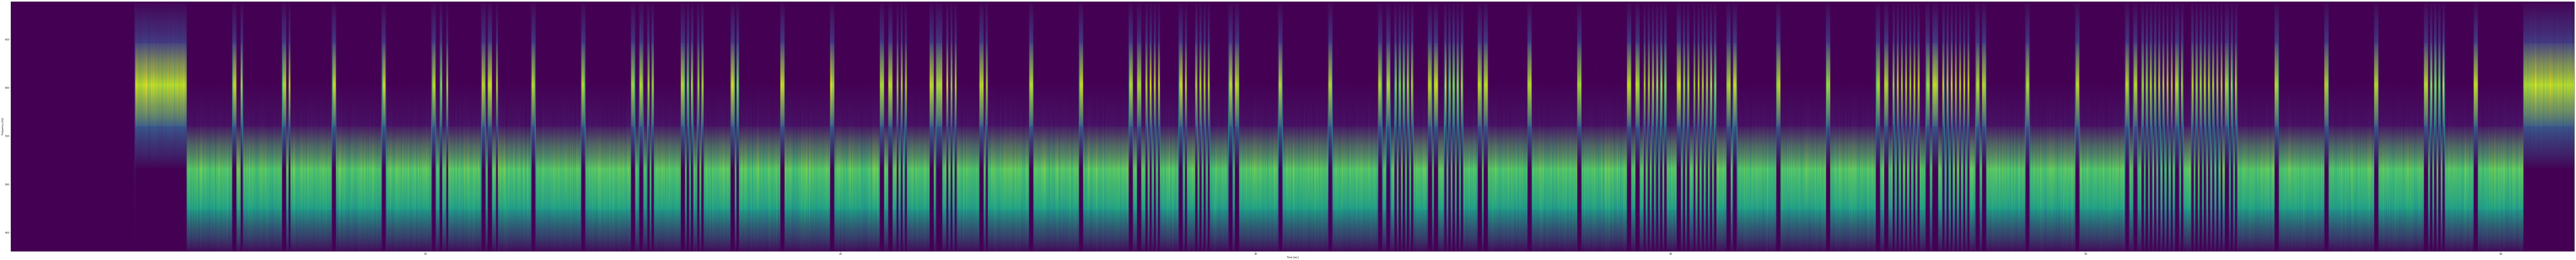

In [3]:
sample_rate, samples = wavfile.read(fn)
frequencies, times, spectrogram = scipy.signal.spectrogram(samples, sample_rate, window='hanning', nperseg=1024)
fs = np.logical_and(frequencies > 400, frequencies < 700)

plt.figure(figsize=(200, 20))
plt.pcolormesh(times, frequencies[fs], spectrogram[fs,:], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

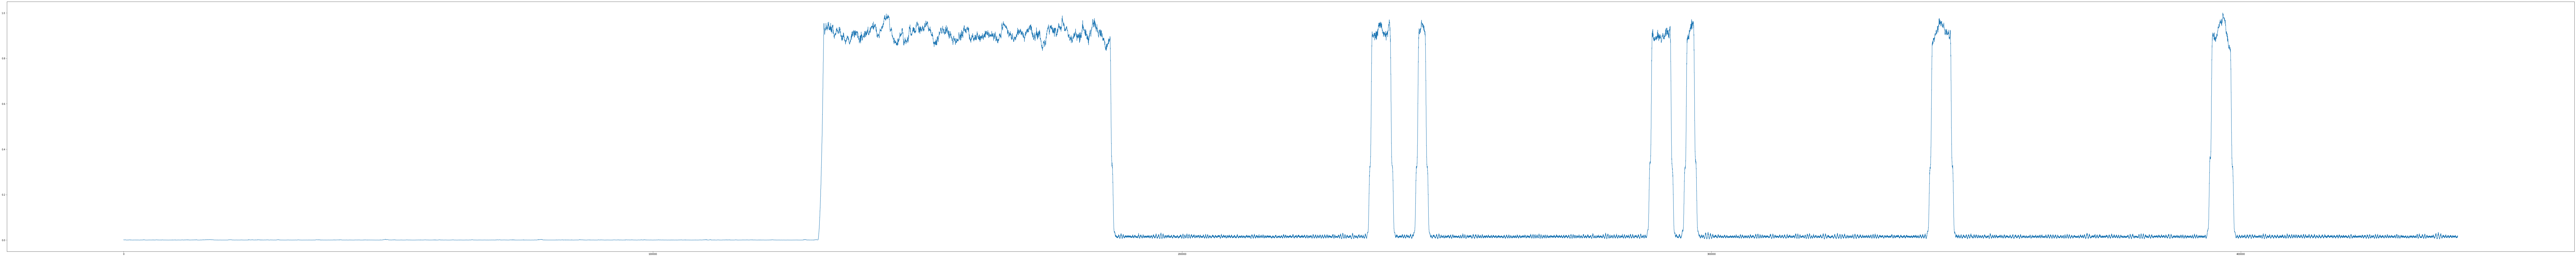

In [4]:
# BFSK demodulator
f1 = 600
resample = 0.025
t = np.linspace(0, f1 * samples.shape[0] * 2 * np.pi / sample_rate, samples.shape[0])
a = np.cumsum(samples * np.cos(t))
b = np.cumsum(samples * np.sin(t))
w = int(sample_rate * resample)
a = (a[:-w] - a[w:]) ** 2
b = (b[:-w] - b[w:]) ** 2
z = a + b
signal = z / np.max(z)

plt.figure(figsize=(200, 20))
plt.plot(signal[:sample_rate*10])
plt.show()

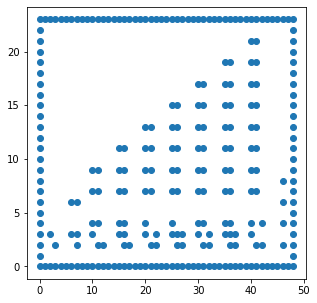

In [5]:
threshold = 0.75
skipsec = 3
resample = 0.05
w = int(sample_rate * resample)
px = np.zeros((49, 24), dtype=np.uint8)
for y in range(px.shape[0]):
    for x in range(px.shape[1]):
        px[y,x] = 1 if signal[skipsec*sample_rate + (y*px.shape[1] + x)*w] > threshold else 0

plt.figure(figsize=(5, 5))
plt.scatter(*np.where(px > 0))
plt.show()

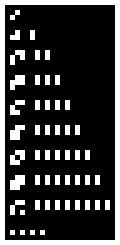

In [6]:
from PIL import Image
im = Image.fromarray(px * 255, mode='L')
scale = 5
xy = im.size[0] * scale, im.size[1] * scale
im.resize(xy, 0)

In [7]:
def display_pixel_image(grid, w=100):
    scale = int(w * 0.92) // grid.shape[1]
    iwh = grid.shape[1] * scale, grid.shape[0] * scale
    size = w, int(grid.shape[0] / grid.shape[1] * w)
    offset = (size[0] - iwh[0]) // 2
    with Image.fromarray(grid*255, mode='L') as im, im.resize(iwh, 0) as im2:
        with Image.new('L', size) as canvas:
            canvas.paste(im2, (offset, offset))
            display(canvas)
    
def display_n(n):
    g = arrival.encode_number(n)
    display_pixel_image(g)
    display(n)

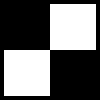

0

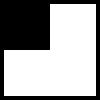

1

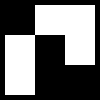

2

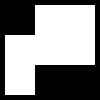

3

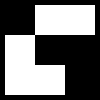

4

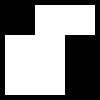

5

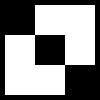

6

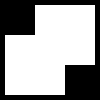

7

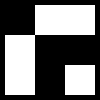

8

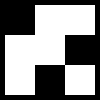

9

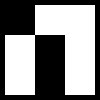

10

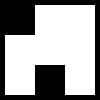

11

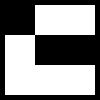

12

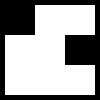

13

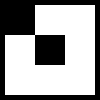

14

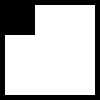

15

In [8]:
for i in range(16):
    display_n(i)

In [9]:
def ocr_arrival_image(fn):
    with Image.open(fn) as im:
        for symbol, box in arrival.ocr_image(im):
            yield (symbol, box, im.crop(box))
    
def decode_arrival_message(fn):
    res = list()
    run = None
    y = None
    for s, box, im in ocr_arrival_image(fn):
        if y != box[1]:
            y = box[1]
            if run: res.append(run)
            run = list()
        run.append(s)
    if run: res.append(run)
    return '\n'.join(' '.join(map(str, r)) for r in res)

def debug_ocr(fn, scale=4, pad=3):
    for symbol, box, crop in ocr_arrival_image(fn):
        crop = crop.resize((crop.size[0]*scale, crop.size[1]*scale), 0)
        wh = crop.size[0] + 2*pad, crop.size[1] + 2*pad
        px = np.zeros((*wh[::-1],3), dtype=np.uint8)
        with Image.fromarray(px, 'RGB') as im:
            im.paste(crop, (pad, pad))
            display(im)
        display(symbol)

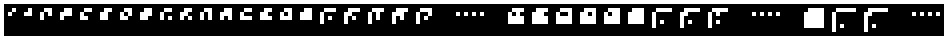

In [10]:
with Image.open('data/message2.png') as im:
    display(im)

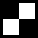

0

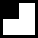

1

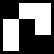

2

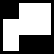

3

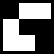

4

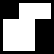

5

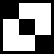

6

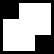

7

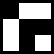

8

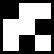

9

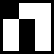

10

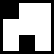

11

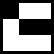

12

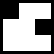

13

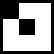

14

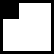

15

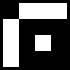

16

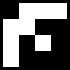

17

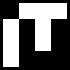

18

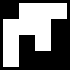

19

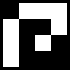

20

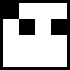

506

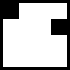

507

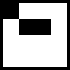

508

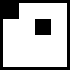

509

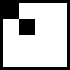

510

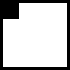

511

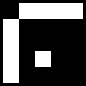

512

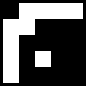

513

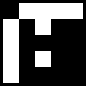

514

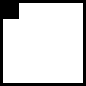

65535

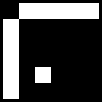

65536

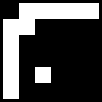

65537

In [11]:
debug_ocr('data/message2.png')

In [12]:
rs = decode_arrival_message('data/message2.png')
print(rs)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 506 507 508 509 510 511 512 513 514 65535 65536 65537


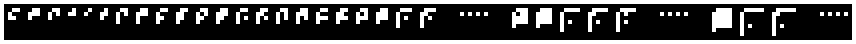

In [13]:
with Image.open('data/message3.png') as im:
    display(im)

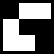

4

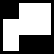

3

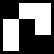

2

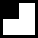

1

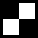

0

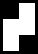

-1

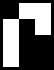

-2

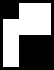

-3

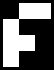

-4

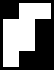

-5

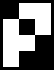

-6

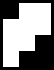

-7

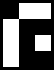

-8

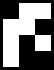

-9

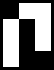

-10

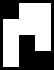

-11

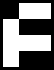

-12

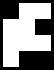

-13

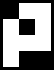

-14

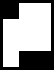

-15

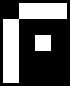

-16

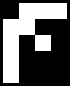

-17

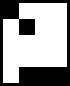

-510

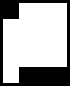

-511

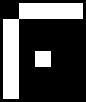

-512

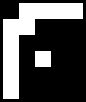

-513

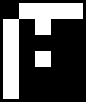

-514

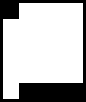

-65535

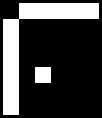

-65536

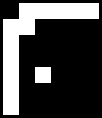

-65537

In [14]:
debug_ocr('data/message3.png')

In [15]:
rs = decode_arrival_message('data/message3.png')
print(rs)

4 3 2 1 0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -510 -511 -512 -513 -514 -65535 -65536 -65537


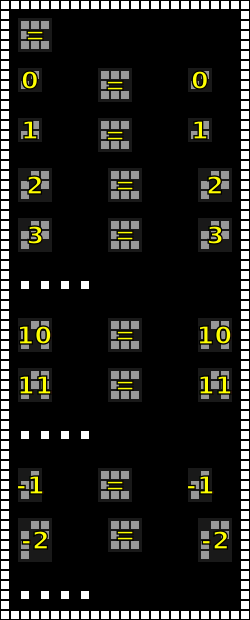

In [16]:
with Image.open('data/message4.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [17]:
rs = decode_arrival_message('data/message4.png')
print(rs)

=
0 = 0
1 = 1
2 = 2
3 = 3
10 = 10
11 = 11
-1 = -1
-2 = -2


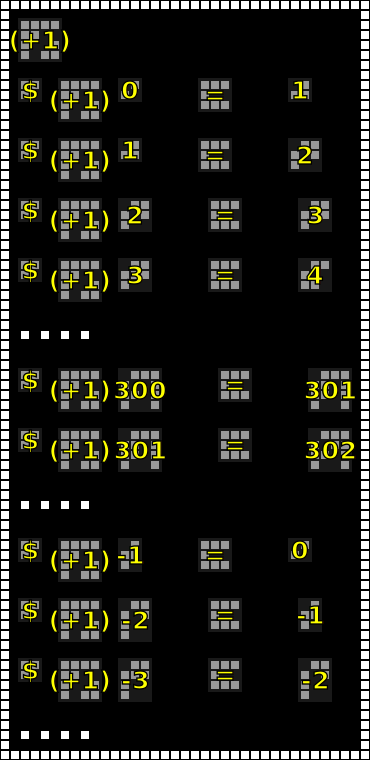

In [18]:
with Image.open('data/message5.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [19]:
rs = decode_arrival_message('data/message5.png')
print(rs)

(+1)
$ (+1) 0 = 1
$ (+1) 1 = 2
$ (+1) 2 = 3
$ (+1) 3 = 4
$ (+1) 300 = 301
$ (+1) 301 = 302
$ (+1) -1 = 0
$ (+1) -2 = -1
$ (+1) -3 = -2


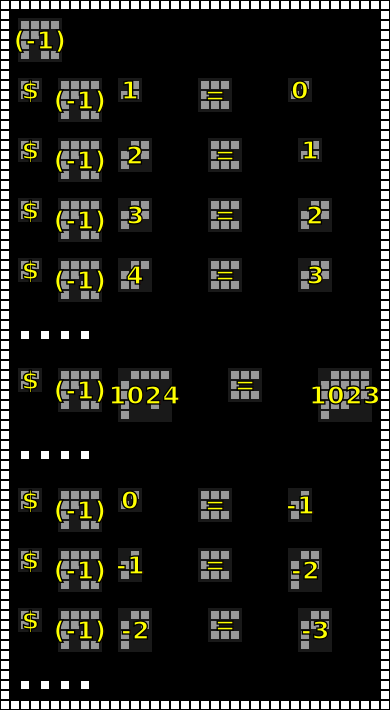

In [20]:
with Image.open('data/message6.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [21]:
rs = decode_arrival_message('data/message6.png')
print(rs)

(-1)
$ (-1) 1 = 0
$ (-1) 2 = 1
$ (-1) 3 = 2
$ (-1) 4 = 3
$ (-1) 1024 = 1023
$ (-1) 0 = -1
$ (-1) -1 = -2
$ (-1) -2 = -3


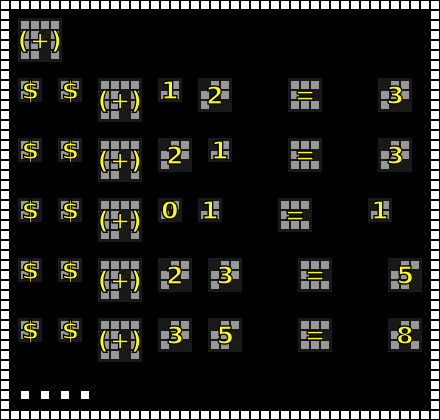

In [22]:
with Image.open('data/message7.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [23]:
rs = decode_arrival_message('data/message7.png')
print(rs)

(+)
$ $ (+) 1 2 = 3
$ $ (+) 2 1 = 3
$ $ (+) 0 1 = 1
$ $ (+) 2 3 = 5
$ $ (+) 3 5 = 8


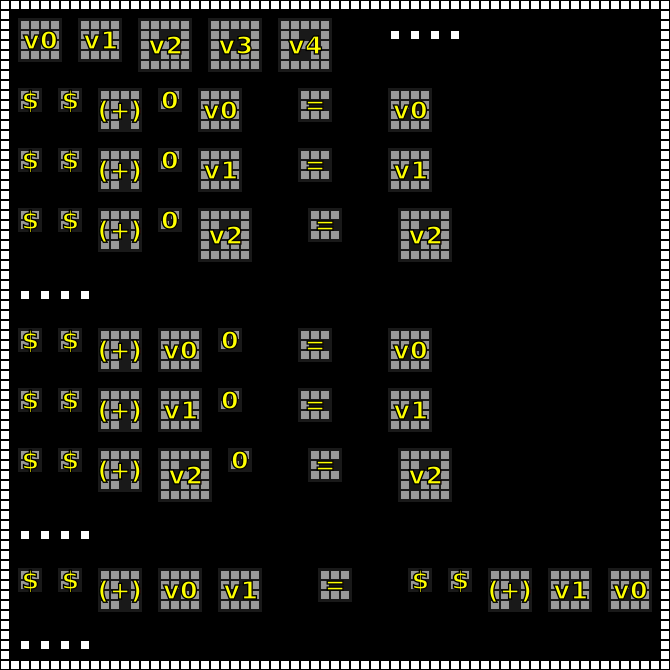

In [24]:
with Image.open('data/message8.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [25]:
rs = decode_arrival_message('data/message8.png')
print(rs)

v0 v1 v2 v3 v4
$ $ (+) 0 v0 = v0
$ $ (+) 0 v1 = v1
$ $ (+) 0 v2 = v2
$ $ (+) v0 0 = v0
$ $ (+) v1 0 = v1
$ $ (+) v2 0 = v2
$ $ (+) v0 v1 = $ $ (+) v1 v0


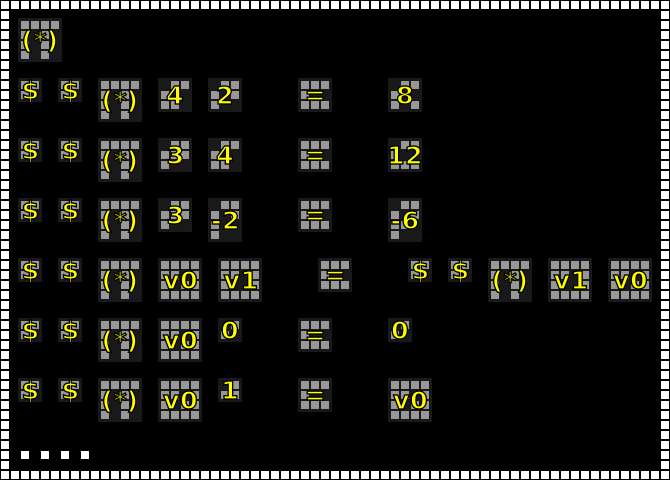

In [26]:
with Image.open('data/message9.png') as im:
    xim = arrival.annotate(im)
    display(SVG(data=xim))

In [27]:
rs = decode_arrival_message('data/message9.png')
print(rs)

(*)
$ $ (*) 4 2 = 8
$ $ (*) 3 4 = 12
$ $ (*) 3 -2 = -6
$ $ (*) v0 v1 = $ $ (*) v1 v0
$ $ (*) v0 0 = 0
$ $ (*) v0 1 = v0
